In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
# isn't there anything similar from tensorflow? split_dataset (tensorflow.keras.utils) only divides in left and right
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.backend import clear_session

In [2]:
# load data
np_data = np.load("data/dataRS.npy")

noise_output = np_data[:,-1].reshape(len(np_data),1)
input = np_data[:,:-1]

# split data
test_split = 0.33
x_train, x_test, y_train, y_test = train_test_split(input, noise_output, test_size=test_split)

In [3]:
#Create a simple ANN
clear_session()
layer_1 = Dense(5, input_shape=(x_train.shape[1],), activation="linear")
layer_2 = Dense(10, activation="relu")
layer_3 = Dense(1, activation="linear")
ann = Sequential([layer_1, layer_2, layer_3])
ann.summary()

plot_model(ann)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [4]:
#Training
#['mean_squared_error', 'mean_absolute_error','mean_squared_logarithmic_error', 'mean_absolute_percentage_error']
ann.compile(optimizer = 'rmsprop', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error','mean_squared_logarithmic_error'])
ann_history = ann.fit(x_train, y_train, epochs=50, batch_size=25, validation_split=0.25)

Epoch 1/50
31/31 [==============================] - 2s 19ms/step - loss: 0.2969 - mean_squared_error: 0.2969 - mean_absolute_error: 0.5122 - mean_squared_logarithmic_error: 0.1625 - val_loss: 0.2073 - val_mean_squared_error: 0.2073 - val_mean_absolute_error: 0.4193 - val_mean_squared_logarithmic_error: 0.1074
Epoch 2/50
31/31 [==============================] - 0s 5ms/step - loss: 0.1496 - mean_squared_error: 0.1496 - mean_absolute_error: 0.3441 - mean_squared_logarithmic_error: 0.0726 - val_loss: 0.0944 - val_mean_squared_error: 0.0944 - val_mean_absolute_error: 0.2661 - val_mean_squared_logarithmic_error: 0.0429
Epoch 3/50
31/31 [==============================] - 0s 6ms/step - loss: 0.0656 - mean_squared_error: 0.0656 - mean_absolute_error: 0.2136 - mean_squared_logarithmic_error: 0.0285 - val_loss: 0.0475 - val_mean_squared_error: 0.0475 - val_mean_absolute_error: 0.1843 - val_mean_squared_logarithmic_error: 0.0206
Epoch 4/50
31/31 [==============================] - 0s 5ms/step - los

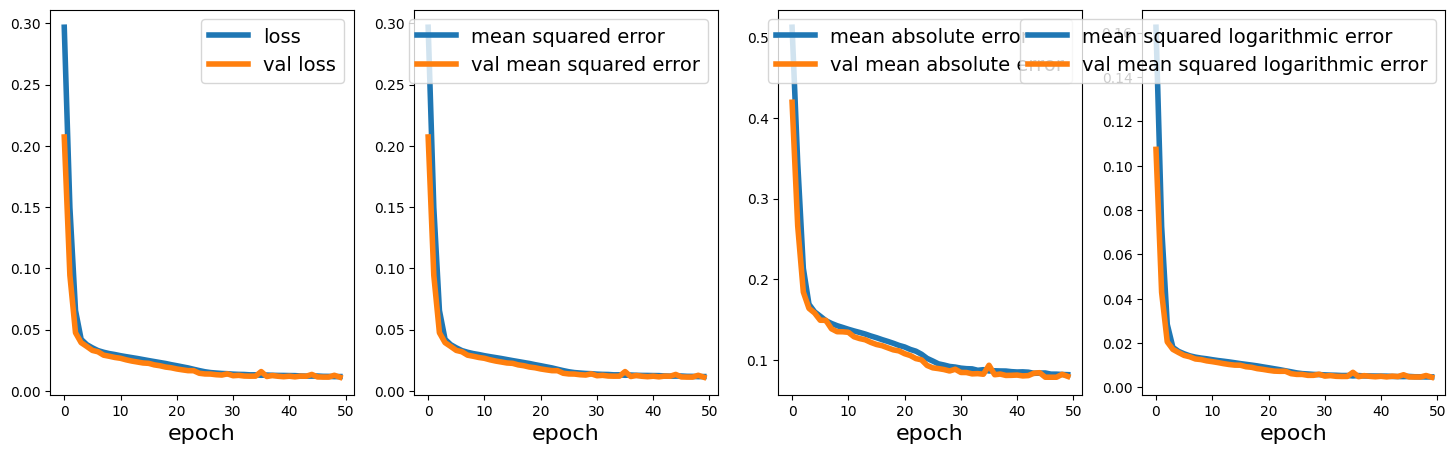

In [5]:
def plot_metrics(history):
    n = len(history.history.keys())//2
    fig,axs = plt.subplots(1,n, figsize=(18,5))

    for i,[key,val] in enumerate(history.history.items()):
        axs[i%n].plot(history.history[key], lw=4, label=key.replace("_", " "))
    
    for ax in axs:
        #ax.set_yscale("log")
        ax.set_xlabel("epoch", fontsize=16)
        ax.legend(fontsize=14)
plot_metrics(ann_history)

In [6]:
evaluation = ann.evaluate(x_test[:-1], y_test[:-1])

16/16 [==============================] - 0s 4ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - mean_absolute_error: 0.0933 - mean_squared_logarithmic_error: 0.0058
